# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [157]:
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

######Importing the data

In [158]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [159]:
link = 'https://drive.google.com/file/d/1tx-e69dVC7QtgbZCFZxBannfvAvn69vh/view?usp=sharing'

# Verify that you have everything after '='
fluff, id = link.split('=')
print (id) 

id = link.split("/")[-2]
#  storing a dataset in pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train-titanic.csv')  
df = pd.read_csv('train-titanic.csv', on_bad_lines='skip')
#making a copy of the dataset
data_copy = df.copy()

sharing


######Viewing the first and last 5 rows of the dataset

In [160]:
#displaying the head
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled




*   The code shows the first 5 rows of the dataset




In [161]:
#displaying the tail
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled




*   The code displays the last 5 rows of the dataset




## Data Overview

- Observations
- Sanity checks

######Shape

In [162]:
df.shape

(36275, 19)



*   The dataset has 36275 rows and 19 columns



######Checking the datatypes of columns in the dataset

In [163]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   The dataset has one column containing float datatype. This is avg_price_per_room.
*   The dataset has 13 columns containing the int data type and 5 columns have string data type.



######Checking missing values

In [164]:
#checking missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64



*   The dataset has no missing values



######Checking duplicated values

In [165]:
#checking for duplicates
df.duplicated().sum()

0



*   The dataset has no duplicates




######Dropping the Booking_ID column

In [166]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [167]:
#drop column Booking_ID
df = df.drop(['Booking_ID'], axis = 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled




*   The booking ID column has been dropped




######Checking the statistical summary

In [168]:
#describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


*   The lead_time has a mean of 85.2325
*   75% of the room have a price of 120
*   50% of people made no special request
*   The Maximum number of repeated guest is 1
*   The minimum average price per room is 0.00
*   The maximum required car packing space is 1


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

######Univariet analysis

In [169]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**lead_time**

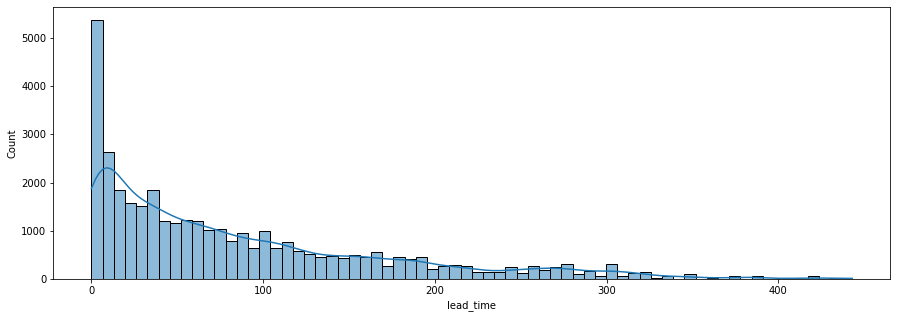

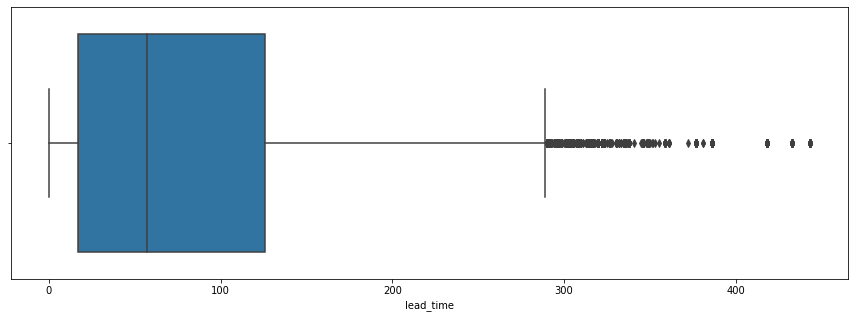

In [170]:
# countplot representing lead_time
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='lead_time', kde = True )
plt.show()

# box plot representing lead_time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='lead_time' )
plt.show()



*   The lead_time is right skewed
*   There is presence of outliers on the column
*   The maximum average lead_time is approximately 500






 **avg_price_per_room**

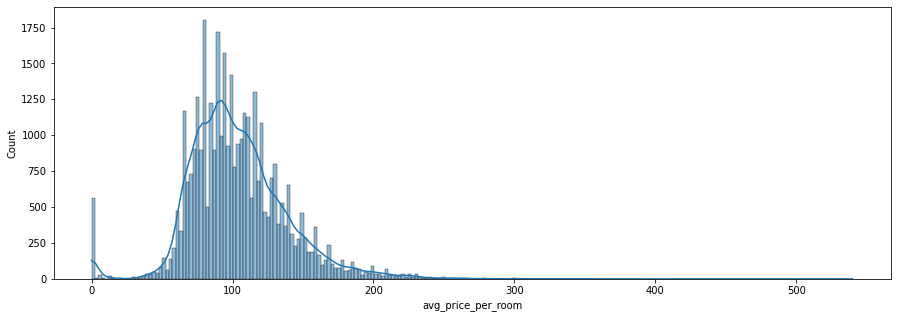

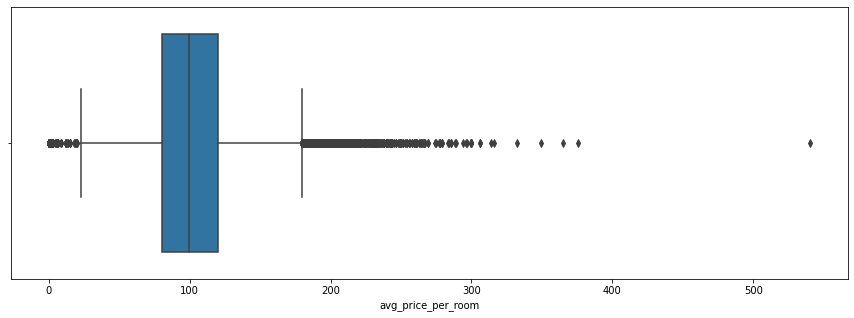

In [171]:
# countplot representing avg_price_per_room
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='avg_price_per_room', kde = True )
plt.show()

# box plot representing avg_price_per_room
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='avg_price_per_room' )
plt.show()



*   The column is right skewed
*   The column has presence of outliers
*   The maximum average price per room is approximately 600
*   Most rooms prices range between 50 to 200





**no_of_previous_cancellations**

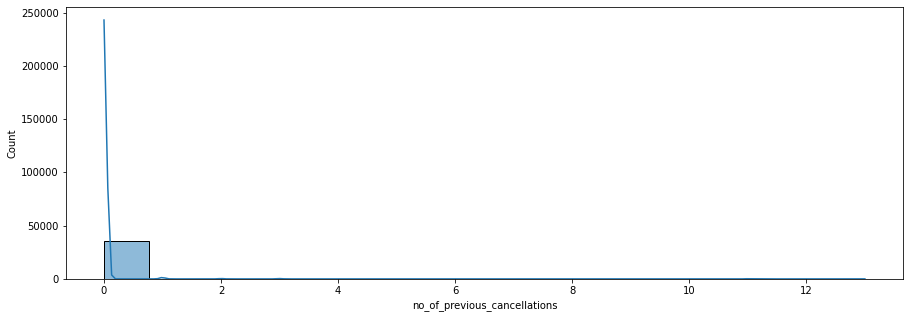

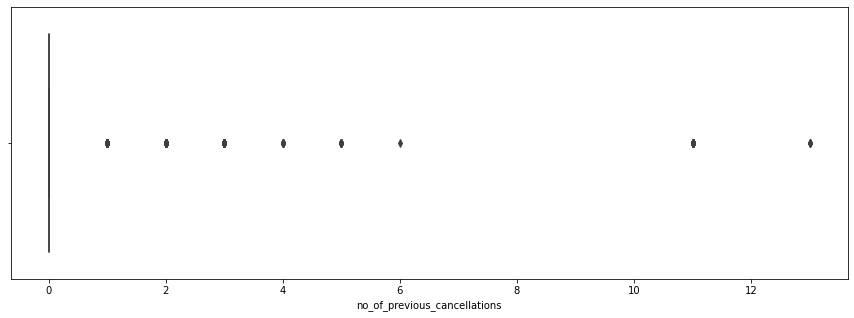

In [172]:
# countplot representing no_of_previous_cancellations
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='no_of_previous_cancellations', kde = True )
plt.show()

# box plot representing no_of_previous_cancellations
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='no_of_previous_cancellations' )
plt.show()



*   The column is right skewed
*   The column has presence of outliers
*   The maximum no of previous cancellations is approximately 13




**number of previous booking not canceled**

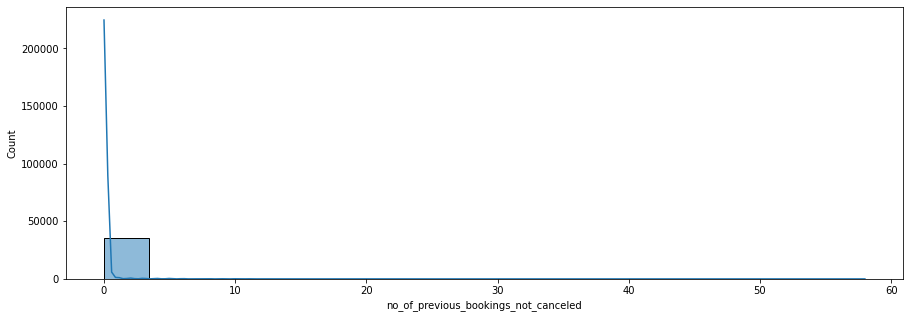

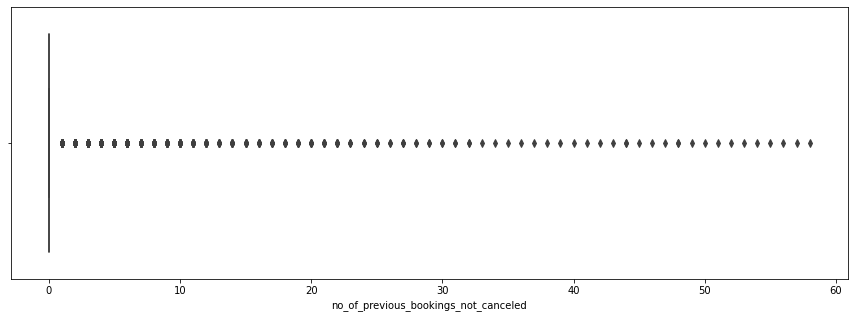

In [173]:
# countplot representing no_of_previous_booking_not_canceled
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='no_of_previous_bookings_not_canceled', kde = True )
plt.show()

# box plot representing no_of_previous_bookings_not_canceled
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='no_of_previous_bookings_not_canceled' )
plt.show()

*   The column is right skewed
*   The column has presence of outliers
*   The maximum no of previous bookings not canceled is approximately 59


In [174]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [175]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**no of adults**

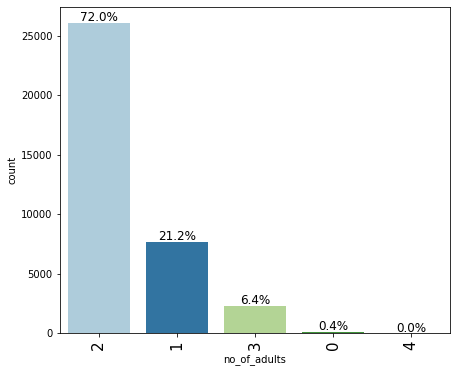

In [176]:
labeled_barplot(df, "no_of_adults", perc=True)



*   72% of bookings consist of 2 people
*   21.2% of bookings consist of 1 person
*   6.4% of bookings consist of 3 people




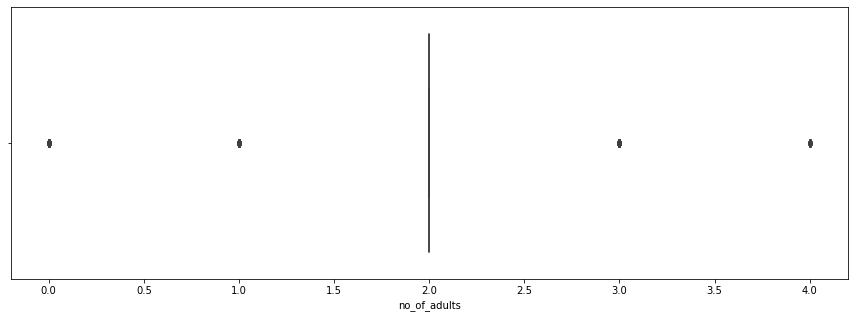

In [177]:

# box plot representing no_of_adults	
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='no_of_adults' )
plt.show()


*   The column has presence of outliers
*   The maximum no of adults is 4
*   Most times the number of adults is 2







**no_of_children**

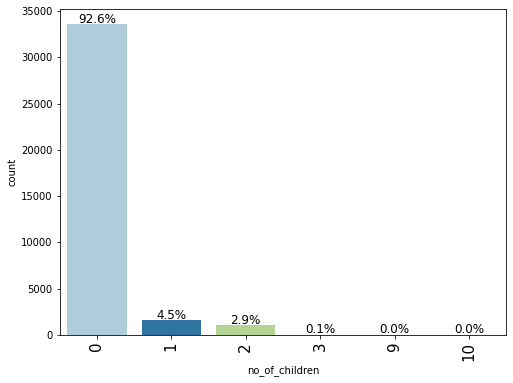

In [178]:
labeled_barplot(df, "no_of_children", perc=True)



*   92.6% of people bring no children at all
*   4.5% of people bring one child
*   2.9% of people bring 2 children
*   0.1% of people bring 3 children






**no of week nights**

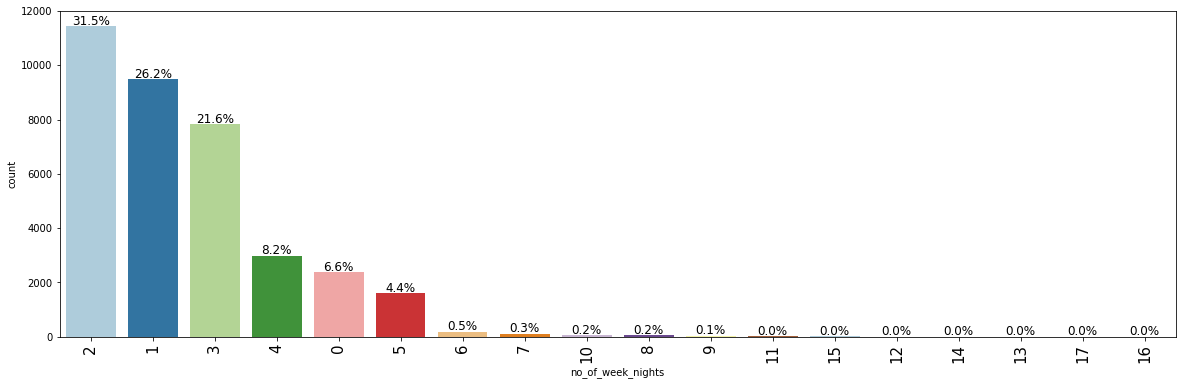

In [179]:
labeled_barplot(df, "no_of_week_nights", perc=True)



*   31.5%  of the bookings are for 2 week nights.
*   26.2%  of the bookings are for 1 week night.
*   21.6%  of the bookings are for 3 week nights.
*   8.2%  of the bookings are for 4 week night.





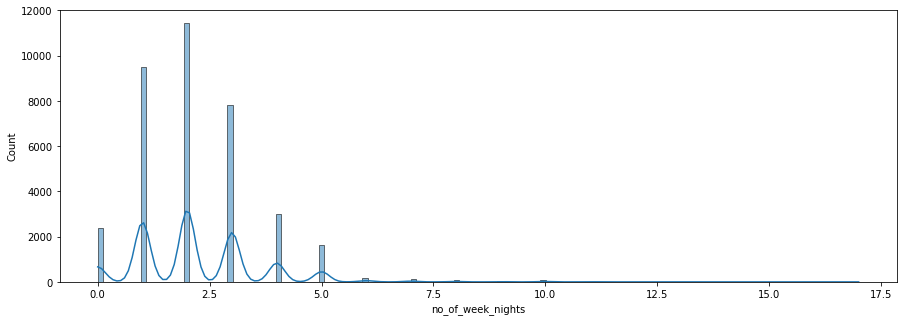

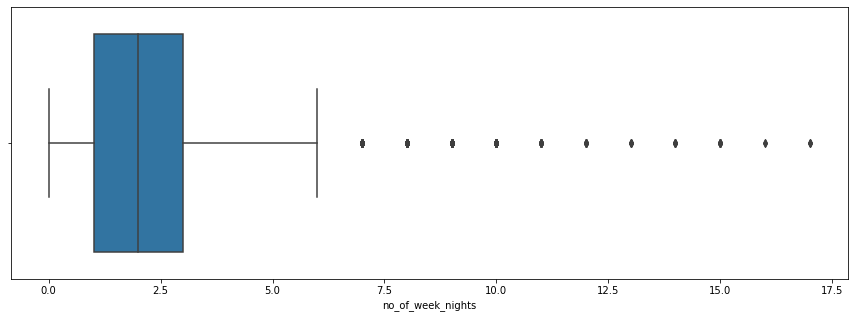

In [180]:
# countplot representing no_of_week_nights	
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='no_of_week_nights', kde = True )
plt.show()

# box plot representing no_of_week_nights	
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='no_of_week_nights' )
plt.show()

*   The column is right skewed
*   The column has presence of outliers


**number of weekend nights**

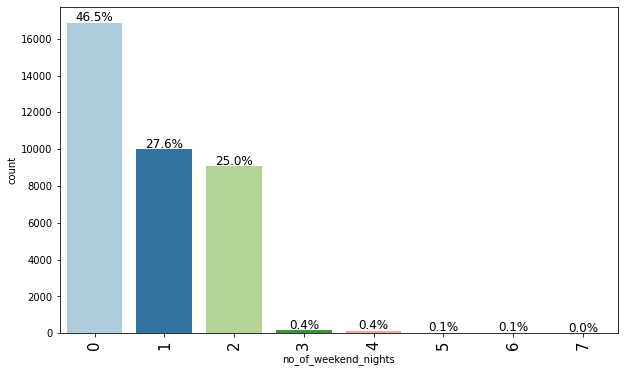

In [181]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

*   46.5%  of the bookings are not for weekend nights.
*   27.6%  of the bookings are for 1 weekend night.
*   25.0%  of the bookings are for 2 weekend nights.
*   0.4%  of the bookings are for 3 weekend nights.
*   0.4%  of the bookings are for 4 weekend nights.




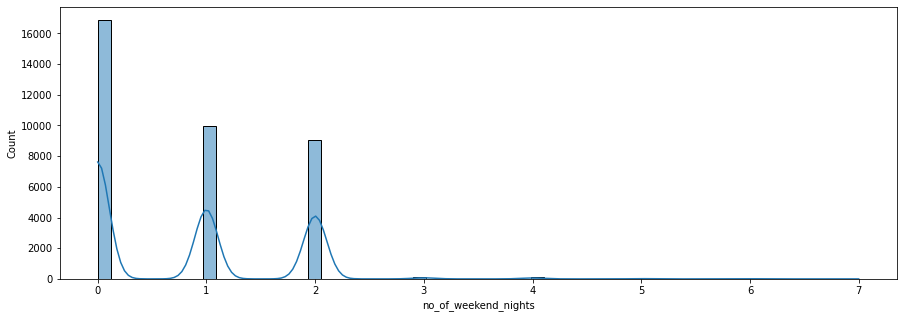

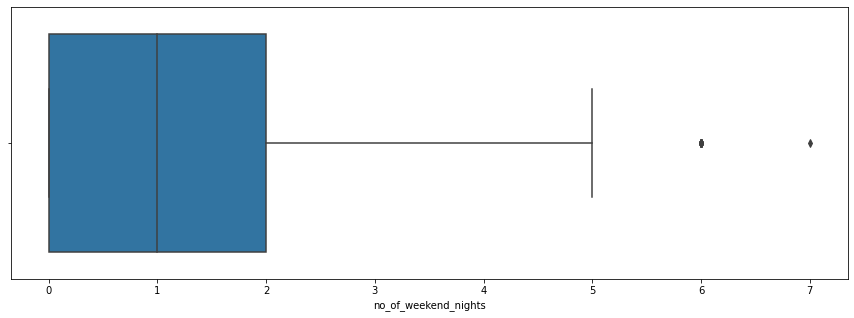

In [182]:
# countplot representing no_of_weekend_nights	
plt.figure(figsize = (15,5))	
sns.histplot(data = df, x ='no_of_weekend_nights', kde = True )
plt.show()

# box plot representing no_of_weekend_nights	
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='no_of_weekend_nights' )
plt.show()



*   There is presence of outliers
*   The data is right skewed
*   The maximum no of weekends a booking was made was for 7 weekends





**required car packing space**

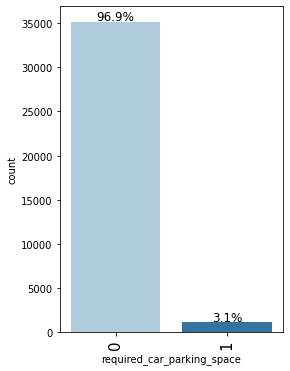

In [183]:
labeled_barplot(df, 'required_car_parking_space', perc = True)



*   96.9% of people require no parcking while only 3.1% require parking




**type_of_meal_plan**

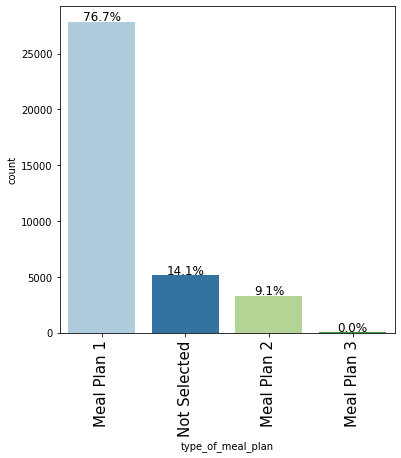

In [184]:
labeled_barplot(df, 'type_of_meal_plan', perc = True)

*   76.7%  selected meal plan 1, 9.1% selected meal plan 2 while 0.0% selected meal plan 3
*   14.1%  did not select a meal plan.



In [185]:
# performing value counts on the column
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

*   27835  selected meal plan 1, 3305 selected meal plan 2 while 5 selected meal plan 3
*   5130  did not select a meal plan.



In [186]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**room type reserved**

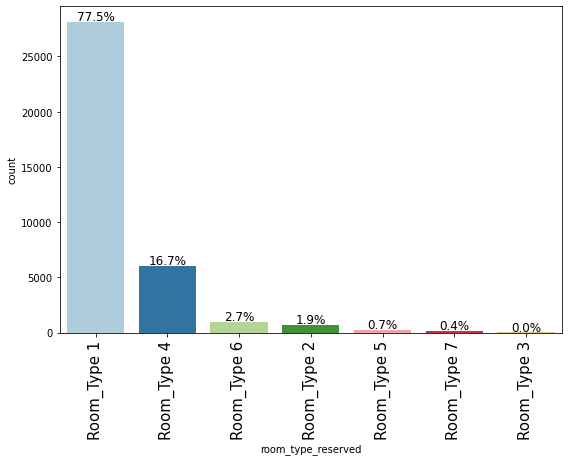

In [187]:
labeled_barplot(df, 'room_type_reserved', perc = True)

*   77.5%  selected room type 1, 16.7% selected room type 4, 2.7%  selected room type 6
*   1.9% selected room type 2, 0.7% selected room type 5 and 0.4% selected room type 7



In [188]:
#value counts
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

*   28130 selected room type 1
*   6057 selected room type 4
*    692  selected room type 6
*   265 selected room type 2  
*   158 selected room type 7 and 7 selected room type 3







**arrival month**

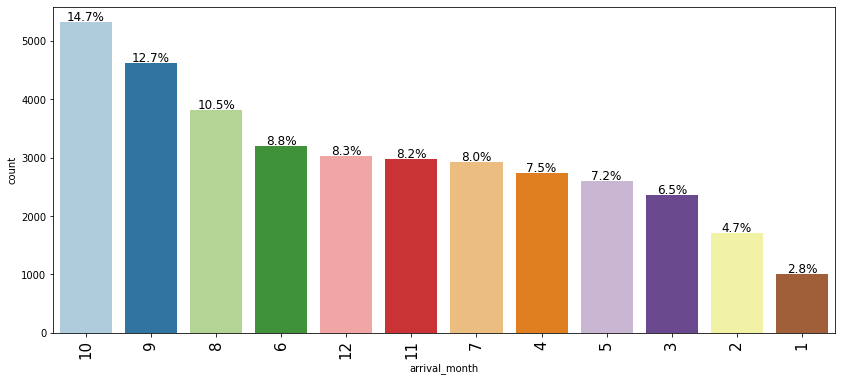

In [189]:
labeled_barplot(df, 'arrival_month', perc = True)



*   The 10 month is the busiest month. It has 14.7%
*   The second busiest month is the 9 month with 12.7%
*   The third busiest month is the 8 month with 10.5%
*   The fourth busiest month is the 6 month with 8.8%




**market segment**

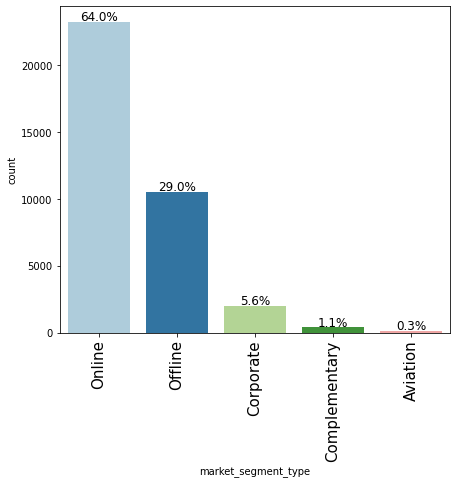

In [190]:
labeled_barplot(df, 'market_segment_type', perc = True)



*   64.0% of the market segment type is online
*   29.0% of the market segment type is offline
*   5.6% of the market segment type is corporate
*   1.1% of the market segment type is complementary and 0.3% is aviation



In [191]:
#value counts
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64



*   23214 of the market segment type is online
*   10528 of the market segment type is offline
*   2017 of the market segment type is corporate
*   391 of the market segment type is complementary and 125 is aviation



**no_of_special_requests**

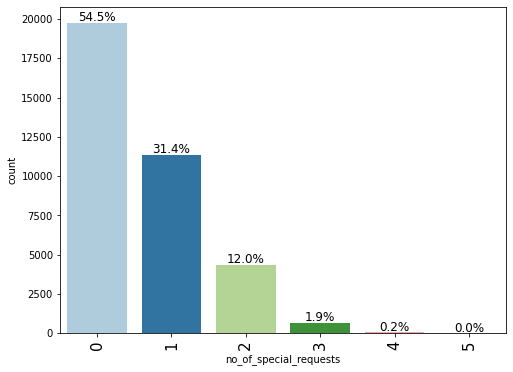

In [192]:
labeled_barplot(df, 'no_of_special_requests', perc = True)



*   54.5 percent do not have any special requests
*   31.4 percent have 1 special request
*   12 percent have 2 special requests
*   1.9 percent have 3 special requests
*   0.2 percent have 4 special requests



**booking status**

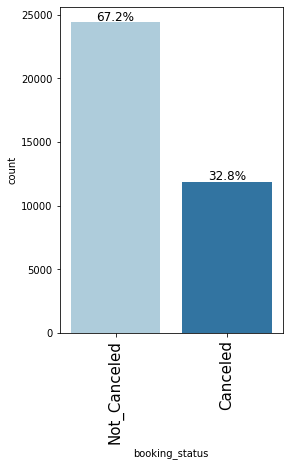

In [193]:
labeled_barplot(df, 'booking_status', perc = True)



*   67.2 percent of bookings were not canceled while 32.8% were canceled



In [194]:
#performing value counts
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



*   24390 percent of bookings were not canceled while 11885 were canceled



###Bivariet Analysis

**Encoding booking status**

In [195]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [196]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1




*   Booking status has been changed to int where 0 represents not cancelled and 1 represents cancelled




######creating a heatmap

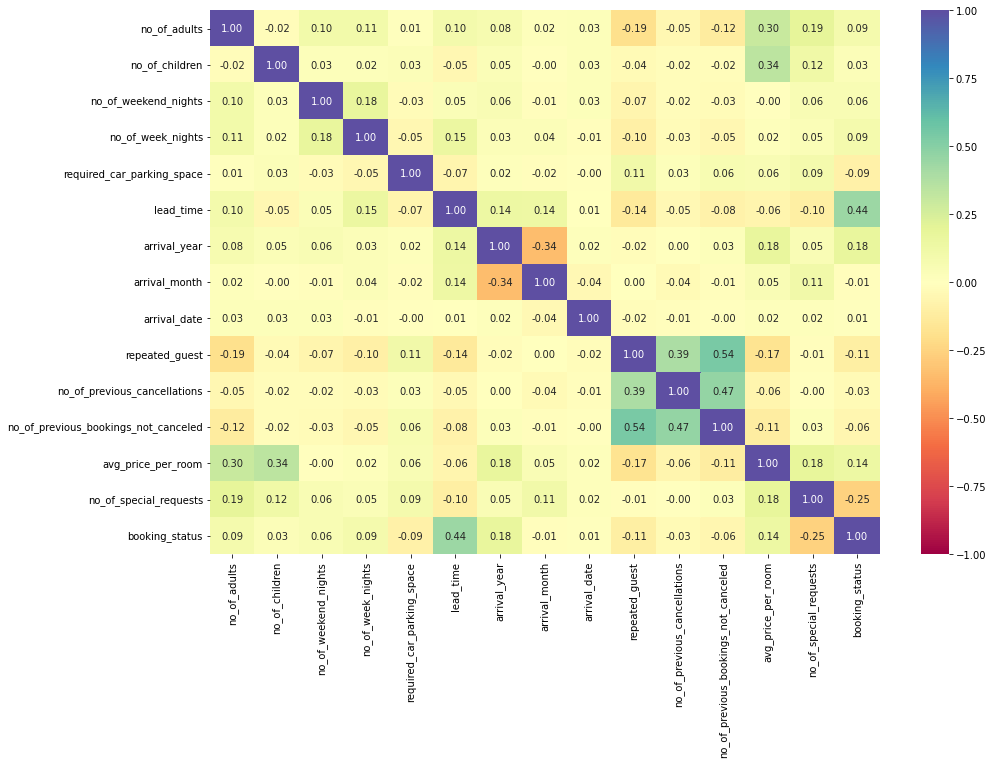

In [197]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

*   The highest correlation is 0.54.
*  repeated guests and number of previous bookings not cancelled have a correlation of 0.54
*   repeated guests and number of previous bookings cancelled have a correlation of 0.39
*   second on the list is the correlation between battery and screen_size which is at 0.47
*   arrival month and arrival year have a correlation of -0.34


**creating a function**

In [198]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        df=df[df[target] == target_uniq[0]],
      #  x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        df=df[df[target] == target_uniq[1]],
      #  x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        #x=target,
       # y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [199]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [200]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


**Booking status vs Market segment**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


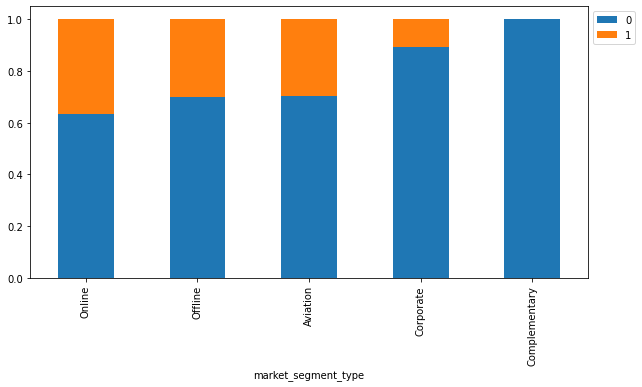

In [201]:
#stacked bar plot
stacked_barplot(df, "market_segment_type", "booking_status")



*   24390 of all bookings were cancelled while 11885 bookings were not cancelled
*   14739 of online bookings were cancelled while 8475 of online bookings were not cancelled
*   7375 of offline bookings were cancelled while 3153 of offline bookings were not cancelled
*   1797 corporate bookings were cancelled while 220  were not cancelled



**no of special requests vs booking status**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


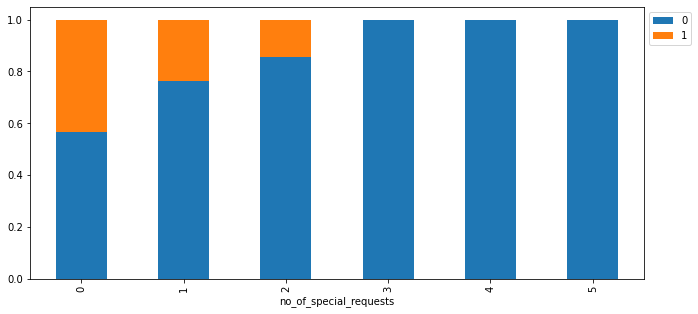

In [202]:
#stacked bar plot
stacked_barplot(df, "no_of_special_requests", "booking_status")



*   8545 of all bookings with no special request were cancelled while 11232 bookings were not cancelled
*   2703 of bookings with 1 special request were cancelled while 11232 of  bookings were not cancelled
*  2703 of bookings with 2 special request were cancelled while 8670 of  bookings were not cancelled
*  637 of bookings with 3 special request were cancelled while 3727 of  bookings were not cancelled



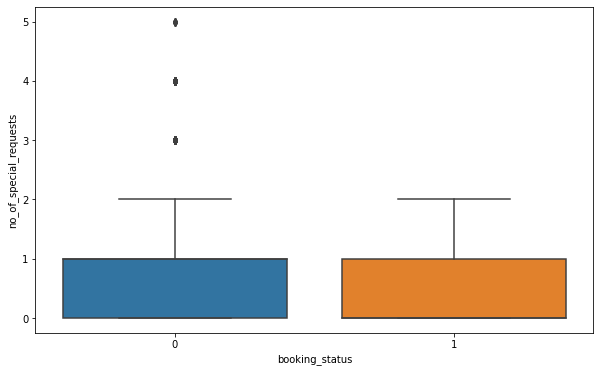

In [203]:
#The relationship between the special requests and booking status

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x= 'booking_status', y='no_of_special_requests')
plt.show()



*   The cancelled boxplot has presence of outliers




**no of special requests vs prices of a room**

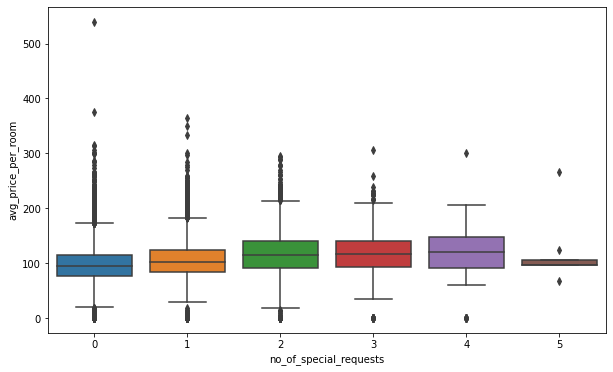

In [204]:
#The relationship between the region and charges

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x= 'no_of_special_requests',y='avg_price_per_room')
plt.show()



*   The maximum average price per room charges with no requests is approximately 590
*   The minimum average price per room  is approximatly 0. This applies to every number of special requests apart from 5



**avg_price_per_room vs booking_status**

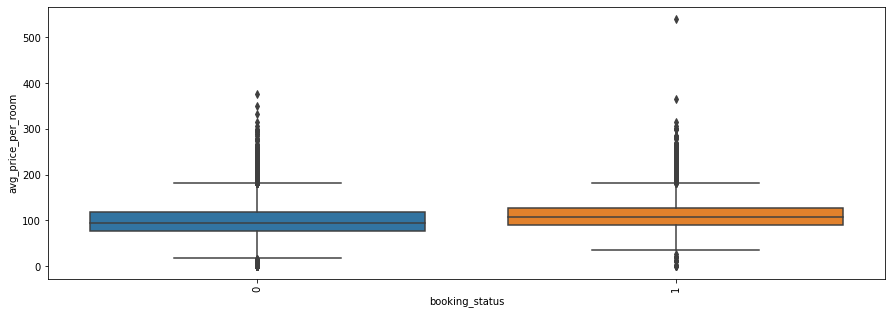

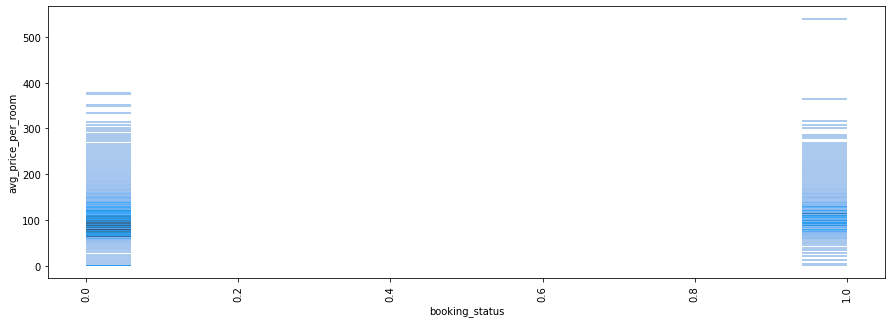

In [205]:
#a boxplot showing the relationship between avg_price_per_room and booking_status
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, y="avg_price_per_room", x="booking_status")
plt.xticks(rotation=90)
plt.show()

#A pointplot showing the relationship between avg_price_per_room and booking_status
plt.figure(figsize=(15, 5))
sns.histplot(data=df, y="avg_price_per_room", x="booking_status")
plt.xticks(rotation=90)
plt.show()



*   The booking of the room with the maximum price was canceled
*   Rooms with higher prices rare most likely to get canceled



**lead_time vs booking status**

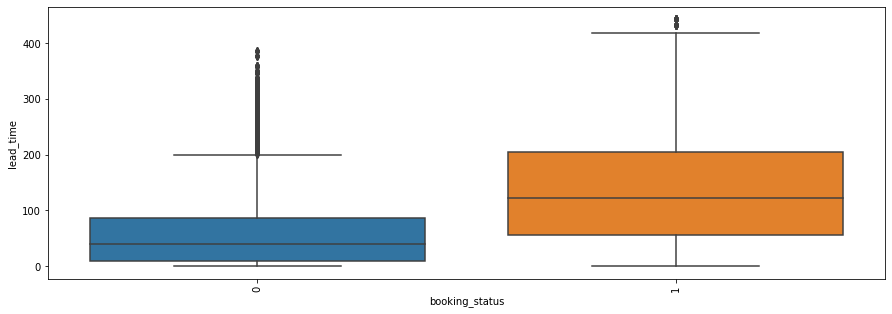

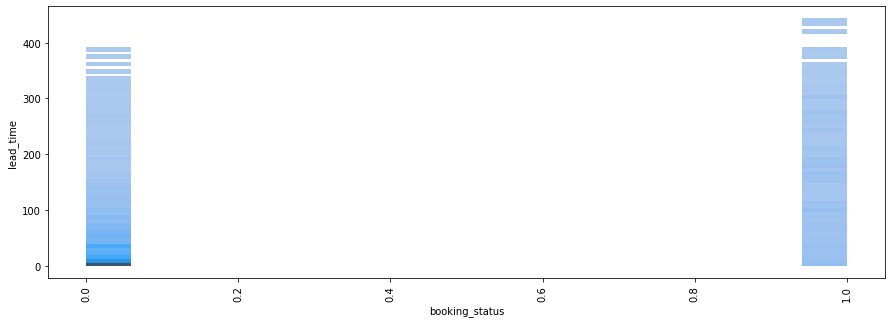

In [206]:
#a boxplot showing the relationship between lead_time and booking status
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, y="lead_time", x="booking_status")
plt.xticks(rotation=90)
plt.show()

#A pointplot showing the relationship between lead_time and booking status
plt.figure(figsize=(15, 5))
sns.histplot(data=df, y="lead_time", x="booking_status")
plt.xticks(rotation=90)
plt.show()



*   The higher the lead time the most likely to room will get canceled
*   Many bookings are canceled as compared to the ones not canceled

In [208]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

######missing values

In [209]:
#copying the dataframe
df02 = df.copy()
df02.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [210]:
df02.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64



*   There are no missing values detected in the dataframe




######Outlier Detection

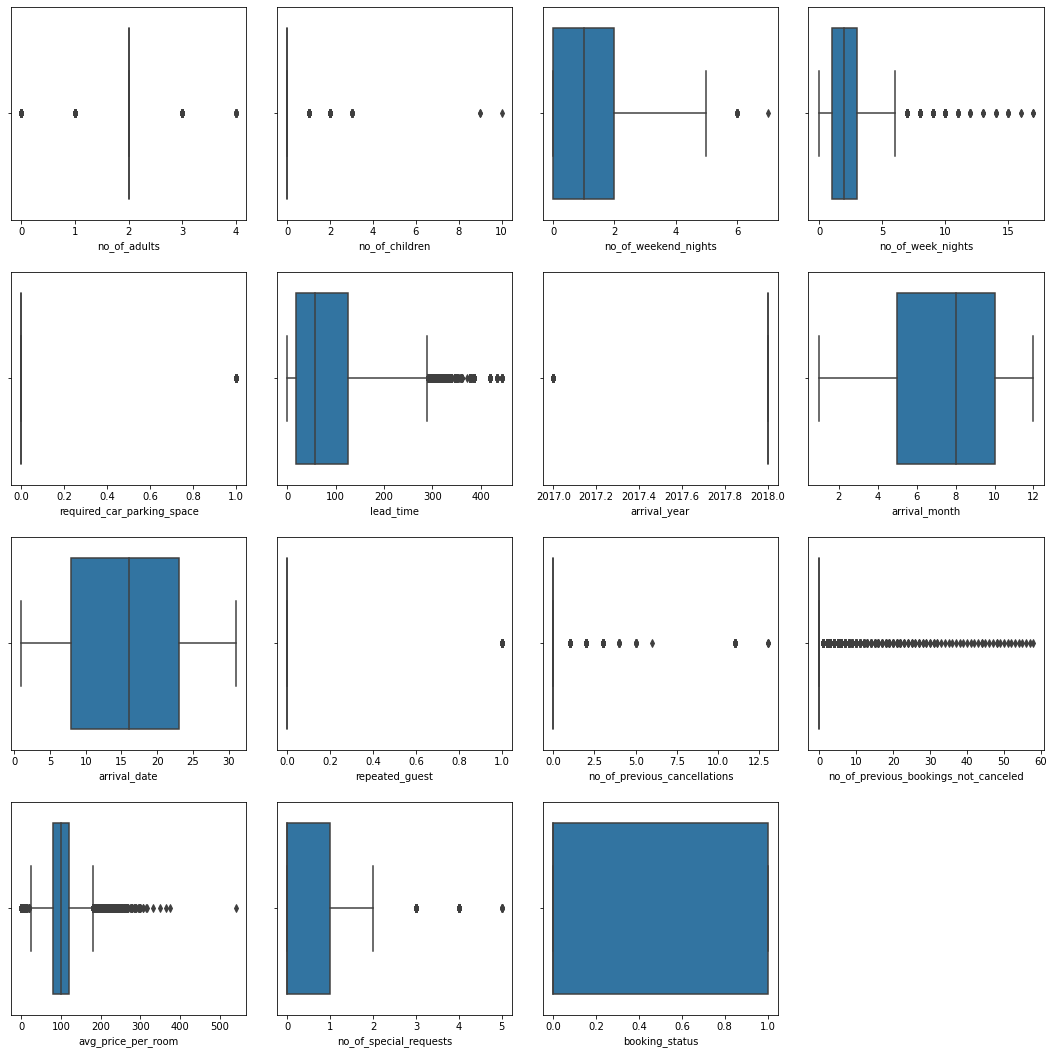

In [211]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   13 columns have outliers
*   only one column does not have outlier. This is the arrival_month column



######Treating the outliers

In [212]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df02[num_cols].quantile(0.25)
Q3 = df02[num_cols].quantile(0.75)

 #Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1

 #Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_whisker = Q1 - 1.5*IQR   
upper_whisker = Q3 + 1.5*IQR



*   This is a function used to calculate the interquartile range




In [213]:
#finding the percenatge of outliers per column
((df02[num_cols] < lower_whisker) | (df02[num_cols] > upper_whisker)).sum()/df02.shape[0]*100

no_of_adults                            28.027567
no_of_children                           7.437629
no_of_weekend_nights                     0.057891
no_of_week_nights                        0.893177
required_car_parking_space               3.098553
lead_time                                3.669194
arrival_year                            17.957271
arrival_month                            0.000000
arrival_date                             0.000000
repeated_guest                           2.563749
no_of_previous_cancellations             0.931771
no_of_previous_bookings_not_canceled     2.238456
avg_price_per_room                       4.675396
no_of_special_requests                   2.097864
booking_status                           0.000000
dtype: float64



*   Number of adults is the column with the highest outlier percentage. It is at 28.028 percent
*   The second highest column is the arrival_year column with 17.957 percent.
*   The column with the lowest outlier percentage is the number of weeknights column with 0.0579 percent






######creating a function to treat outliers

In [214]:
def treat_outliers(df2, column):
    
    Q1 = df2[column].quantile(0.25)  # 25th quantile
    Q3 = df2[column].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1       # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

  
    df2[column] = np.clip(df2[column], lower_whisker, upper_whisker)

    return df2

######Treating outliers in the no_of_weekend_nights column

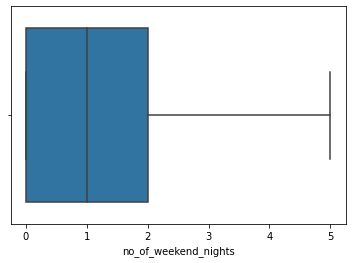

In [215]:
#treating outliers
df02 = treat_outliers(df02,'no_of_weekend_nights')

# visualizing the column after outlier treatment
sns.boxplot(data=df02,x='no_of_weekend_nights')
plt.show()



*   The outliers in the column have been removed




######Treating outliers in the no_of_week_nights columns

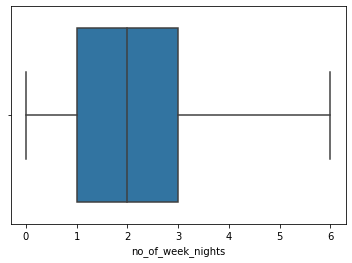

In [216]:
#treating outliers
df02 = treat_outliers(df02,'no_of_week_nights')

# visualizing the column after outlier treatment
sns.boxplot(data=df02,x='no_of_week_nights')
plt.show()



*   The column no_of_week_nights has no presence of outliers




######Treating outliers in the number_of_special_requests_column

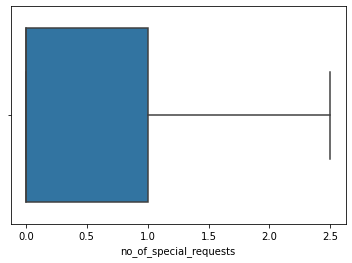

In [217]:
#treating outliers
df02 = treat_outliers(df02,'no_of_special_requests')

# visualizing the column after outlier treatment
sns.boxplot(data=df02,x='no_of_special_requests')
plt.show()



*   The ouliers in the column have been removed



###feature engineering

######dropping categorical columns

In [218]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


######dropping column room_type_reserved

In [219]:
#dropping column
df02 = df02.drop('room_type_reserved', axis = 1)
df02.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1.0,2.0,Meal Plan 1,0,224,2017,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2.0,3.0,Not Selected,0,5,2018,11,6,Online,0,0,0,106.68,1.0,0
2,1,0,2.0,1.0,Meal Plan 1,0,1,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0.0,2.0,Meal Plan 1,0,211,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1.0,1.0,Not Selected,0,48,2018,4,11,Online,0,0,0,94.50,0.0,1




*   The column has been dropped




######Dropping column type_of_meal_plan

In [220]:
#dropping column
df02 = df02.drop('type_of_meal_plan', axis = 1)
df02.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1.0,2.0,0,224,2017,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2.0,3.0,0,5,2018,11,6,Online,0,0,0,106.68,1.0,0
2,1,0,2.0,1.0,0,1,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0.0,2.0,0,211,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1.0,1.0,0,48,2018,4,11,Online,0,0,0,94.50,0.0,1




*   The column has been dropped




######Data preparation for modelling

In [221]:
df02.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1.0,2.0,0,224,2017,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2.0,3.0,0,5,2018,11,6,Online,0,0,0,106.68,1.0,0
2,1,0,2.0,1.0,0,1,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0.0,2.0,0,211,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1.0,1.0,0,48,2018,4,11,Online,0,0,0,94.50,0.0,1


**Defining the dependent and independent variable**

In [222]:
# splitting the data into the dependent and independent variables
x = df02.drop("booking_status", axis=1)
y = df02["booking_status"]

print(x.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                   1.0                2.0   
1             2               0                   2.0                3.0   
2             1               0                   2.0                1.0   
3             2               0                   0.0                2.0   
4             2               0                   1.0                1.0   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date market_segment_type  repeated_guest  \
0             2             Offline              



*   The dependent variable is the booking_status




**Adding the intercept**

In [223]:
x = sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**creating dummy variables**

In [224]:
#creating dummy variables
# drop_first=True will drop one of the columns
df02 = pd.get_dummies(df02, columns=["market_segment_type"], drop_first=True)
df02.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1.0,2.0,0,224,2017,10,2,0,0,0,65.00,0.0,0,0,0,1,0
1,2,0,2.0,3.0,0,5,2018,11,6,0,0,0,106.68,1.0,0,0,0,0,1
2,1,0,2.0,1.0,0,1,2018,2,28,0,0,0,60.00,0.0,1,0,0,0,1
3,2,0,0.0,2.0,0,211,2018,5,20,0,0,0,100.00,0.0,1,0,0,0,1
4,2,0,1.0,1.0,0,48,2018,4,11,0,0,0,94.50,0.0,1,0,0,0,1




*   The market segment type column has been divided into 5 columns.
*   The first division has been dropped



**splitting the dataset into training and testing set**

In [225]:
#splitting it 70:30
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

In [226]:
x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
13662,1.0,1,0,0.0,1.0,0,163,2018,10,15,Offline,0,0,0,115.00,0.0
26641,1.0,2,0,0.0,3.0,0,113,2018,3,31,Online,0,0,0,78.15,1.0
17835,1.0,2,0,2.0,3.0,0,359,2018,10,14,Offline,0,0,0,78.00,1.0
21485,1.0,2,0,0.0,3.0,0,136,2018,6,29,Online,0,0,0,85.50,0.0
5670,1.0,2,0,1.0,2.0,0,21,2018,8,15,Online,0,0,0,151.00,0.0




*   The dataset has been split into 70:30.
*   70 goes to the training set and 30 to the testing set



In [227]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 16)
Shape of test set :  (10883, 16)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64




*   The training set is made up of 25392 rows and 16 columns
*   The testing set is made up of 10883 rows and 1 columns



In [228]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [229]:
#creating dummy variables
# drop_first=True will drop one of the columns
x_train = pd.get_dummies(x_train, columns=["market_segment_type"], drop_first=True)
x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.0,1,0,0.0,1.0,0,163,2018,10,15,0,0,0,115.00,0.0,0,0,1,0
26641,1.0,2,0,0.0,3.0,0,113,2018,3,31,0,0,0,78.15,1.0,0,0,0,1
17835,1.0,2,0,2.0,3.0,0,359,2018,10,14,0,0,0,78.00,1.0,0,0,1,0
21485,1.0,2,0,0.0,3.0,0,136,2018,6,29,0,0,0,85.50,0.0,0,0,0,1
5670,1.0,2,0,1.0,2.0,0,21,2018,8,15,0,0,0,151.00,0.0,0,0,0,1


## EDA

- It is a good idea to explore the data once again after manipulating it.

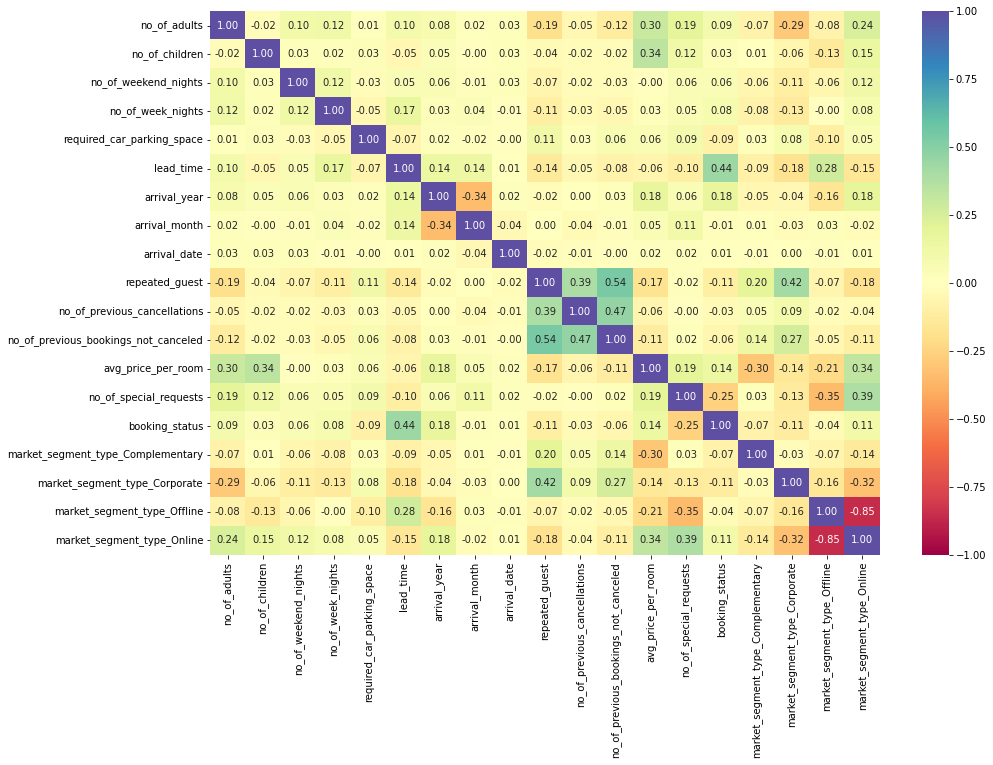

In [230]:
cols_list = df02.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(
    df02[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   The correlation of most features is still similar to before the features were engineered.
*   The highest correlation is 0.54.
*  repeated guests and number of previous bookings not cancelled have a correlation of 0.54
*   repeated guests and number of previous bookings cancelled have a correlation of 0.39
*   second on the list is the correlation between battery and screen_size which is at 0.47
*   arrival month and arrival year have a correlation of -0.34
*  The lowest correlation is -0.85. The correlation is between market segment type online and market segment type offline


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

**function to check the VIF**

In [231]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [232]:
checking_vif(x_train)

,feature,VIF
0,const,3.605162e+07
1,no_of_adults,1.277684e+00
2,no_of_children,1.185176e+00
3,no_of_weekend_nights,1.049838e+00
4,no_of_week_nights,1.068267e+00
5,required_car_parking_space,1.039401e+00
6,lead_time,1.272840e+00
7,arrival_year,1.306835e+00
8,arrival_month,1.243920e+00
9,arrival_date,1.005683e+00




*   The column market_segment_type_Online	has a VIF of 70.64. This is the highest VIF
*   The second highest VIF is the market_segment_type_Offline column with a VIF of 63.57


## Building a Logistic Regression model

In [233]:
# fitting the model on training set
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()

         Current function value: 0.428649
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [234]:
# printing the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3236
Time:                        19:13:16   Log-Likelihood:                -10884.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -943.6725    114.568     -8.237      0.000   -1168.223    -719.122
no_of_adults                             0.0721      



*   There are 6 columns with a p value > 0.005




## Model performance evaluation

In [235]:
# predicting on training set

predict_train = lg.predict(x_train) > 0.5
predict_train = np.round(predict_train)

######Building the confusion matrix on the training set

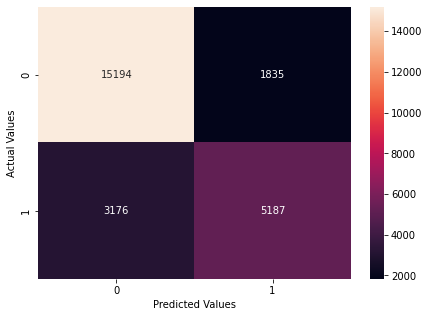

In [236]:
confusionm = confusion_matrix(y_train, predict_train)
plt.figure(figsize=(7, 5))
sns.heatmap(confusionm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()



* The model has predicted the following:




> * True Positives (TP):  15194 True positives
* True Negatives (TN): 5187  Ture Negatives
* False Positives (FP): 1835 False positives
* False Negatives (FN): 3176 False Negatives




######Checking the accuracy of the model

In [237]:
print("Accuracy on training set : ", accuracy_score(y_train, predict_train))

Accuracy on training set :  0.8026543793320731


* The model is performing well on the training set with an accuracy of 0.803

###Dropping Columns with a P value greator than 0.05

In [238]:
# printing the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3236
Time:                        19:13:16   Log-Likelihood:                -10884.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -943.6725    114.568     -8.237      0.000   -1168.223    -719.122
no_of_adults                             0.0721      

######Dropping number of children

In [239]:
#droping column
x_train1 = x_train.drop("no_of_children", axis=1)

In [240]:
# fitting the model on training set
logit1 = sm.Logit(y_train, x_train1.astype(float))
log1 = logit1.fit()

predict_train1 = log1.predict(x_train1)
predict_train1 = np.round(predict_train1)


         Current function value: 0.428696
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [241]:
#checking the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train1))

Accuracy on training set :  0.8023393194706995




*   The accuracy is still the same after dropping the column




In [242]:
#  summary of the model
print(log1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3235
Time:                        19:13:16   Log-Likelihood:                -10885.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -951.1812    114.427     -8.313      0.000   -1175.455    -726.908
no_of_adults                             0.0828      

######Dropping Number of week nights columns

In [243]:
#dropping column
x_train2 = x_train1.drop("no_of_week_nights", axis=1)

In [244]:
# fitting the model on training set
logit2 = sm.Logit(y_train, x_train2.astype(float))
log2 = logit2.fit()

predict_train2 = log2.predict(x_train2)
predict_train2 = np.round(predict_train2)
print(log2.summary())


         Current function value: 0.428698
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3235
Time:                        19:13:17   Log-Likelihood:                -10886.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -950.5889    114.398     -8.309      0.000   -1174.805

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




*   The column has been dropped




In [245]:
#checking the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train2))

Accuracy on training set :  0.8026149968494014


*   The accuracy is still the same after dropping the column

######Dropping arrival date 

In [246]:
#dropping column
x_train3 = x_train2.drop("arrival_date", axis=1)

In [247]:
# fitting the model on training set
logit3 = sm.Logit(y_train, x_train3.astype(float))
log3 = logit3.fit()

predict_train3 = log3.predict(x_train3)
predict_train3 = np.round(predict_train3)
print(log3.summary())


         Current function value: 0.428700
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3235
Time:                        19:13:17   Log-Likelihood:                -10886.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -950.5051    114.405     -8.308      0.000   -1174.735

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




*   The column has been dropped




In [248]:
#checking the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train3))

Accuracy on training set :  0.8026937618147448


*   The accuracy is still the same after dropping the column

######Dropping market segment type coplimentary

In [249]:
#dropping column
x_train4 = x_train3.drop("market_segment_type_Complementary", axis=1)

In [250]:
# fitting the model on training set
logit4 = sm.Logit(y_train, x_train4.astype(float))
log4 = logit4.fit()

predict_train4 = log4.predict(x_train4)
predict_train4 = np.round(predict_train4)
print(log4.summary())


Optimization terminated successfully.
         Current function value: 0.429307
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3226
Time:                        19:13:18   Log-Likelihood:                -10901.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -959.5532    114.



*   The column has been dropped




In [251]:
#checking the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train4))

Accuracy on training set :  0.8030088216761184




*   The accuracy has increased by 0.001




######Dropping the market_segment_type_Online column

In [252]:
#dropping column
x_train5 = x_train4.drop('market_segment_type_Online', axis =1)

In [253]:
# fitting the model on training set
logit5 = sm.Logit(y_train, x_train5.astype(float))
log5 = logit5.fit()

predict_train5 = log5.predict(x_train5)
predict_train5 = np.round(predict_train5)
print(log5.summary())


Optimization terminated successfully.
         Current function value: 0.429352
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3225
Time:                        19:13:18   Log-Likelihood:                -10902.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -953.8995    114.



*   The column has been dropped




In [254]:
#checking the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train5))

Accuracy on training set :  0.803205734089477




*   The accuracy has not changed




######Dropping column no_of_previous_bookings_not_canceled  

In [255]:
x_train6 = x_train5.drop('no_of_previous_bookings_not_canceled', axis = 1)

In [256]:
# fitting the model on training set
logit6 = sm.Logit(y_train, x_train6.astype(float))
log6 = logit6.fit()

predict_train6 = log6.predict(x_train6)
predict_train6 = np.round(predict_train6)
print(log6.summary())


Optimization terminated successfully.
         Current function value: 0.429407
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25379
Method:                           MLE   Df Model:                           12
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3224
Time:                        19:13:18   Log-Likelihood:                -10903.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -952.8359    114.194     -8.344      0



*   The column has been dropped




In [257]:
#checking the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train6))

Accuracy on training set :  0.8031663516068053




*   The accuracy has not changed




###Cheking the VIF again

In [258]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [259]:
checking_vif(x_train6)

,feature,VIF
0,const,3.585608e+07
1,no_of_adults,1.222633e+00
2,no_of_weekend_nights,1.030360e+00
3,required_car_parking_space,1.037920e+00
4,lead_time,1.238606e+00
5,arrival_year,1.300018e+00
6,arrival_month,1.236451e+00
7,repeated_guest,1.510366e+00
8,no_of_previous_cancellations,1.203239e+00
9,avg_price_per_room,1.238601e+00




*   There is no VIF greater than 5. This shows that there is little multicolliniearity




######Converting coefficients to odds

In [260]:
# converting coefficients to odds
odds = np.exp(log6.params)

# adding the odds to a dataframe
pd.DataFrame(odds, x_train6.columns, columns=["odds"]).T

,const,no_of_adults,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,market_segment_type_Corporate,market_segment_type_Offline
odds,0.0,1.083986,1.102535,0.202431,1.015746,1.601579,0.963071,0.05724,1.259361,1.015892,0.228107,0.403756,0.167316


In [261]:
# finding the percentage change
percentage_change_odds = (np.exp(log6.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(percentage_change_odds, x_train6.columns, columns=["change_odds%"]).T

,const,no_of_adults,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,market_segment_type_Corporate,market_segment_type_Offline
change_odds%,-100.0,8.398598,10.253516,-79.756933,1.57463,60.157918,-3.692927,-94.276044,25.936119,1.589208,-77.18935,-59.624352,-83.268407


* `no_of_adults`: Holding all other features constant, a unit change in no_of_adults will increase the odds of a booking being canceled by 1.0839 times or by 8.399%.
*  `arrival_year`: Holding all other features constant, a unit change in arrival_year will increase the odds of a booking being canceled by 1.601 times or by 60.157%
*  `no_of_previous_cancellations	`: Holding all other features constant, a unit change in no_of_previous_cancellations	 will increase the odds of a booking being canceled by 1.259 times or by 25.936%




## Final Model Summary

######Accuracy on training set

In [262]:
print("Accuracy on training set : ", accuracy_score(y_train, predict_train6))

Accuracy on training set :  0.8031663516068053




*   The accuracy on the training set is 0.8032




######Confusion matrix on training set

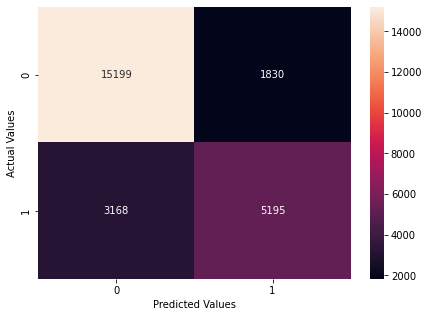

In [263]:
confusionm = confusion_matrix(y_train, predict_train6)
plt.figure(figsize=(7, 5))
sns.heatmap(confusionm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

######ROC-AUC on training set

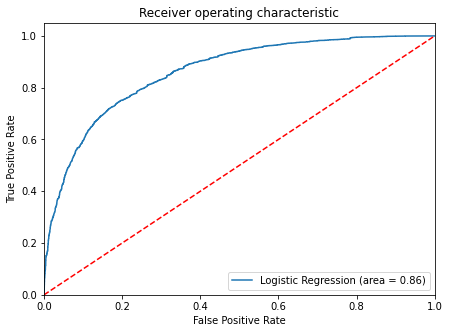

In [264]:
logit_roc_auc_train = roc_auc_score(y_train, log6.predict(x_train6))
fpr, tpr, thresholds = roc_curve(y_train, log6.predict(x_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()



*   The model has a good performance on the training set



###Using the model on the testing set

**dropping columns**

In [265]:
x_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30392,1.0,1,0,1.0,0.0,0,53,2018,9,11,Online,0,0,0,94.32,0.0
6685,1.0,2,0,1.0,2.0,0,63,2018,4,22,Online,0,0,0,105.30,1.0
8369,1.0,2,0,2.0,3.0,0,55,2018,9,11,Online,0,0,0,106.24,0.0
2055,1.0,2,0,0.0,2.0,0,53,2017,12,29,Online,0,0,0,81.00,1.0
10969,1.0,1,0,2.0,4.0,0,245,2018,7,6,Offline,0,0,0,110.00,0.0


In [266]:
#creating dummy variables
# drop_first=True will drop one of the columns
x_test = pd.get_dummies(x_test, columns=["market_segment_type"], drop_first=True)
x_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,0,1.0,0.0,0,53,2018,9,11,0,0,0,94.32,0.0,0,0,0,1
6685,1.0,2,0,1.0,2.0,0,63,2018,4,22,0,0,0,105.30,1.0,0,0,0,1
8369,1.0,2,0,2.0,3.0,0,55,2018,9,11,0,0,0,106.24,0.0,0,0,0,1
2055,1.0,2,0,0.0,2.0,0,53,2017,12,29,0,0,0,81.00,1.0,0,0,0,1
10969,1.0,1,0,2.0,4.0,0,245,2018,7,6,0,0,0,110.00,0.0,0,0,1,0


In [267]:
#dropping number of children
x_test = x_test.drop(['no_of_children'], axis = 1)
x_test.head()

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,1.0,0.0,0,53,2018,9,11,0,0,0,94.32,0.0,0,0,0,1
6685,1.0,2,1.0,2.0,0,63,2018,4,22,0,0,0,105.30,1.0,0,0,0,1
8369,1.0,2,2.0,3.0,0,55,2018,9,11,0,0,0,106.24,0.0,0,0,0,1
2055,1.0,2,0.0,2.0,0,53,2017,12,29,0,0,0,81.00,1.0,0,0,0,1
10969,1.0,1,2.0,4.0,0,245,2018,7,6,0,0,0,110.00,0.0,0,0,1,0


In [268]:
#dropping arrival_date
x_test = x_test.drop(['arrival_date'], axis = 1)
x_test.head()

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,1.0,0.0,0,53,2018,9,0,0,0,94.32,0.0,0,0,0,1
6685,1.0,2,1.0,2.0,0,63,2018,4,0,0,0,105.30,1.0,0,0,0,1
8369,1.0,2,2.0,3.0,0,55,2018,9,0,0,0,106.24,0.0,0,0,0,1
2055,1.0,2,0.0,2.0,0,53,2017,12,0,0,0,81.00,1.0,0,0,0,1
10969,1.0,1,2.0,4.0,0,245,2018,7,0,0,0,110.00,0.0,0,0,1,0


In [269]:
#dropping number of no_of_week_nights
x_test = x_test.drop(['no_of_week_nights'], axis = 1)
x_test.head()

,const,no_of_adults,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,1.0,0,53,2018,9,0,0,0,94.32,0.0,0,0,0,1
6685,1.0,2,1.0,0,63,2018,4,0,0,0,105.30,1.0,0,0,0,1
8369,1.0,2,2.0,0,55,2018,9,0,0,0,106.24,0.0,0,0,0,1
2055,1.0,2,0.0,0,53,2017,12,0,0,0,81.00,1.0,0,0,0,1
10969,1.0,1,2.0,0,245,2018,7,0,0,0,110.00,0.0,0,0,1,0


In [270]:
#dropping number of previous bookings not canceled
x_test = x_test.drop(['no_of_previous_bookings_not_canceled'], axis = 1)
x_test.head()

,const,no_of_adults,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,1.0,0,53,2018,9,0,0,94.32,0.0,0,0,0,1
6685,1.0,2,1.0,0,63,2018,4,0,0,105.30,1.0,0,0,0,1
8369,1.0,2,2.0,0,55,2018,9,0,0,106.24,0.0,0,0,0,1
2055,1.0,2,0.0,0,53,2017,12,0,0,81.00,1.0,0,0,0,1
10969,1.0,1,2.0,0,245,2018,7,0,0,110.00,0.0,0,0,1,0


In [271]:
#dropping market_segment_type_Complementary
x_test = x_test.drop(['market_segment_type_Complementary'], axis = 1)
x_test.head()

,const,no_of_adults,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,1.0,0,53,2018,9,0,0,94.32,0.0,0,0,1
6685,1.0,2,1.0,0,63,2018,4,0,0,105.30,1.0,0,0,1
8369,1.0,2,2.0,0,55,2018,9,0,0,106.24,0.0,0,0,1
2055,1.0,2,0.0,0,53,2017,12,0,0,81.00,1.0,0,0,1
10969,1.0,1,2.0,0,245,2018,7,0,0,110.00,0.0,0,1,0


In [272]:
#dropping market_segment_type_online
x_test = x_test.drop(['market_segment_type_Online'], axis = 1)
x_test.head()

,const,no_of_adults,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,market_segment_type_Corporate,market_segment_type_Offline
30392,1.0,1,1.0,0,53,2018,9,0,0,94.32,0.0,0,0
6685,1.0,2,1.0,0,63,2018,4,0,0,105.30,1.0,0,0
8369,1.0,2,2.0,0,55,2018,9,0,0,106.24,0.0,0,0
2055,1.0,2,0.0,0,53,2017,12,0,0,81.00,1.0,0,0
10969,1.0,1,2.0,0,245,2018,7,0,0,110.00,0.0,0,1




*   All the columns dropped in x_train have been dropped in x_test




######Using the model to make predictions on the test data

In [273]:
predict_test = log6.predict(x_test) > 0.5
predict_test = np.round(predict_test)

In [274]:
#checking accuracy
print("Accuracy on training set : ", accuracy_score(y_train, predict_train6))
print("Accuracy on test set : ", accuracy_score(y_test, predict_test))

Accuracy on training set :  0.8031663516068053
Accuracy on test set :  0.8043737939906276




*   The model is working well with the testing data also
*   It has an accuracy of 0.804 on the testing set
*   The model is not overfitting






## Building a Decision Tree model

###Data Preperation to build a decision tree

In [275]:
#copying the dataset
df03 = df.copy()

In [276]:
df03.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


######Treating outliers

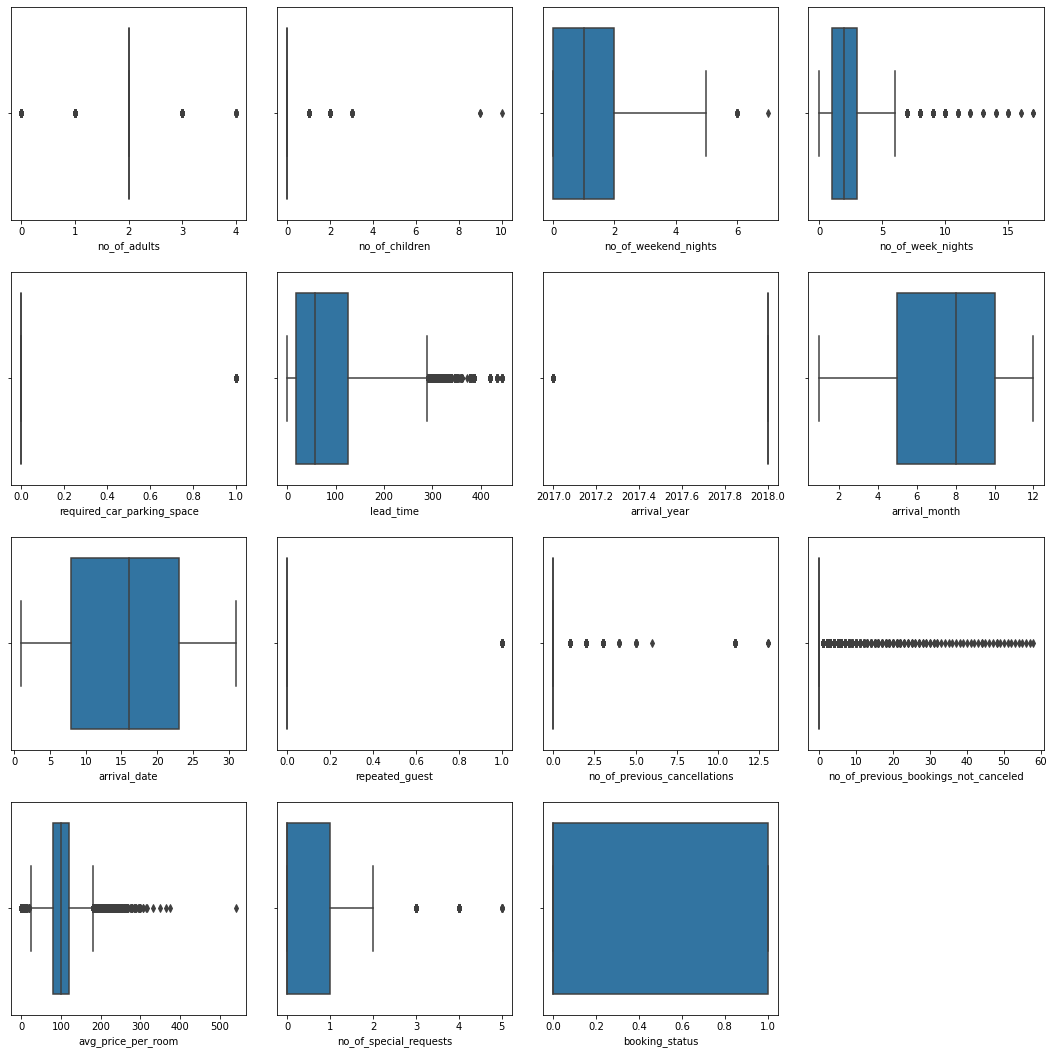

In [277]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   The boxplots shows which columns have presence of outliers




######Function to calculate interquartile range

In [278]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df03[num_cols].quantile(0.25)
Q3 = df03[num_cols].quantile(0.75)

 #Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1

 #Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_whisker = Q1 - 1.5*IQR   
upper_whisker = Q3 + 1.5*IQR



*   The function is uesd to calculate the Interquartile range




######Function to treat outliers

In [279]:
def treat_outliers(df2, column):
    
    Q1 = df2[column].quantile(0.25)  # 25th quantile
    Q3 = df2[column].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1       # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

  
    df2[column] = np.clip(df2[column], lower_whisker, upper_whisker)

    return df2



*   The function is used to remove outliers in a column




######Finding the percentage of the outliers

In [280]:
# Percentage of outliers in each column
((df03[num_cols] < lower_whisker) | (df03[num_cols] > upper_whisker)).sum()/df03.shape[0]*100

no_of_adults                            28.027567
no_of_children                           7.437629
no_of_weekend_nights                     0.057891
no_of_week_nights                        0.893177
required_car_parking_space               3.098553
lead_time                                3.669194
arrival_year                            17.957271
arrival_month                            0.000000
arrival_date                             0.000000
repeated_guest                           2.563749
no_of_previous_cancellations             0.931771
no_of_previous_bookings_not_canceled     2.238456
avg_price_per_room                       4.675396
no_of_special_requests                   2.097864
booking_status                           0.000000
dtype: float64

######Treating outliers on the number of weekend nights

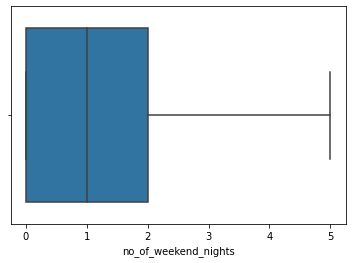

In [281]:
#treating outliers
df03 = treat_outliers(df03,'no_of_weekend_nights')

# visualizing the column after outlier treatment
sns.boxplot(data=df03,x='no_of_weekend_nights')
plt.show()



*   All the outliers have been removed




######Treating outliers in the number of week nights

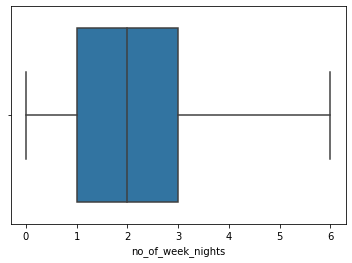

In [282]:
#treating outliers
df03 = treat_outliers(df03,'no_of_week_nights')

# visualizing the column after outlier treatment
sns.boxplot(data=df03,x='no_of_week_nights')
plt.show()



*   All the outliers have been removed



######Treating outliers in the no of special requests column

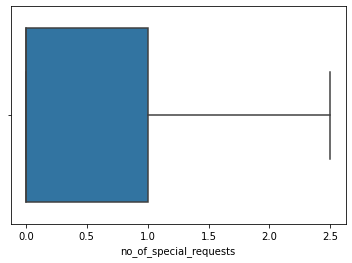

In [283]:
#treating outliers
df03= treat_outliers(df03,'no_of_special_requests')

# visualizing the column after outlier treatment
sns.boxplot(data=df03,x='no_of_special_requests')
plt.show()



*   All the outliers have been removed




######Dropping categorical columns

In [284]:
df03.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2.0,3.0,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1.0,0
2,1,0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1.0,1.0,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0.0,1


In [285]:
#dropping column
df03 = df03.drop(['type_of_meal_plan'], axis = 1)
df03.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1.0,2.0,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2.0,3.0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1.0,0
2,1,0,2.0,1.0,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0.0,2.0,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1.0,1.0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0.0,1




*   The column has been dropped




In [286]:
#dropping column
df03 = df03.drop(['room_type_reserved'], axis = 1)
df03.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1.0,2.0,0,224,2017,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2.0,3.0,0,5,2018,11,6,Online,0,0,0,106.68,1.0,0
2,1,0,2.0,1.0,0,1,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0.0,2.0,0,211,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1.0,1.0,0,48,2018,4,11,Online,0,0,0,94.50,0.0,1




*   The column has been dropped




**Defining dependent and independent variables** 

In [287]:
# splitting the data into the dependent and independent variables
x = df03.drop("booking_status", axis=1)
y = df03["booking_status"]

print(x.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                   1.0                2.0   
1             2               0                   2.0                3.0   
2             1               0                   2.0                1.0   
3             2               0                   0.0                2.0   
4             2               0                   1.0                1.0   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date market_segment_type  repeated_guest  \
0             2             Offline              



*   Here, the code defines the dependent and independent variables




**Adding the x intercept**

In [288]:
#intercept
x = sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**creating dummy variables**

In [289]:
#creating dummy variables
# drop_first=True will drop one of the three origin columns
df03 = pd.get_dummies(df03, columns=["market_segment_type"], drop_first=True)
df03.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1.0,2.0,0,224,2017,10,2,0,0,0,65.00,0.0,0,0,0,1,0
1,2,0,2.0,3.0,0,5,2018,11,6,0,0,0,106.68,1.0,0,0,0,0,1
2,1,0,2.0,1.0,0,1,2018,2,28,0,0,0,60.00,0.0,1,0,0,0,1
3,2,0,0.0,2.0,0,211,2018,5,20,0,0,0,100.00,0.0,1,0,0,0,1
4,2,0,1.0,1.0,0,48,2018,4,11,0,0,0,94.50,0.0,1,0,0,0,1




*   Market segment type dummy variables have been created




**splitting the dataset**

In [290]:
#splitting it 70:30
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

In [291]:
x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
13662,1.0,1,0,0.0,1.0,0,163,2018,10,15,Offline,0,0,0,115.00,0.0
26641,1.0,2,0,0.0,3.0,0,113,2018,3,31,Online,0,0,0,78.15,1.0
17835,1.0,2,0,2.0,3.0,0,359,2018,10,14,Offline,0,0,0,78.00,1.0
21485,1.0,2,0,0.0,3.0,0,136,2018,6,29,Online,0,0,0,85.50,0.0
5670,1.0,2,0,1.0,2.0,0,21,2018,8,15,Online,0,0,0,151.00,0.0




*   The dataset has been split into 70:30
*   70 goes to the training set and 30 goes to the testing set



In [292]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 16)
Shape of test set :  (10883, 16)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64




*   25392 rows and 16 are being used as the training set while 10883 rows and 16 columns are used as the testing set




In [293]:
#creating dummy variables
# drop_first=True will drop one of the three origin columns
x_train = pd.get_dummies(x_train, columns=["market_segment_type"], drop_first=True)
x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.0,1,0,0.0,1.0,0,163,2018,10,15,0,0,0,115.00,0.0,0,0,1,0
26641,1.0,2,0,0.0,3.0,0,113,2018,3,31,0,0,0,78.15,1.0,0,0,0,1
17835,1.0,2,0,2.0,3.0,0,359,2018,10,14,0,0,0,78.00,1.0,0,0,1,0
21485,1.0,2,0,0.0,3.0,0,136,2018,6,29,0,0,0,85.50,0.0,0,0,0,1
5670,1.0,2,0,1.0,2.0,0,21,2018,8,15,0,0,0,151.00,0.0,0,0,0,1


In [294]:
#creating dummy variables
# drop_first=True will drop one of the three origin columns
x_test = pd.get_dummies(x_test, columns=["market_segment_type"], drop_first=True)
x_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,0,1.0,0.0,0,53,2018,9,11,0,0,0,94.32,0.0,0,0,0,1
6685,1.0,2,0,1.0,2.0,0,63,2018,4,22,0,0,0,105.30,1.0,0,0,0,1
8369,1.0,2,0,2.0,3.0,0,55,2018,9,11,0,0,0,106.24,0.0,0,0,0,1
2055,1.0,2,0,0.0,2.0,0,53,2017,12,29,0,0,0,81.00,1.0,0,0,0,1
10969,1.0,1,0,2.0,4.0,0,245,2018,7,6,0,0,0,110.00,0.0,0,0,1,0


###Building a decision tree model

In [295]:
#building a decision tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)



*   The tree is split using the gini criterion




In [296]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  0.9941713925645873
Accuracy on test set :  0.8701644767067904


In [297]:
y_pred = dTree.predict(x_test)


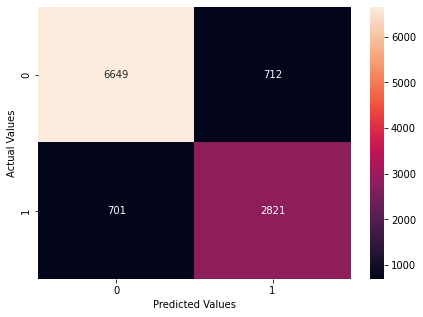

In [298]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

######Checking the decision tree performance

In [299]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  0.9941713925645873
Accuracy on test set :  0.8701644767067904




*   The tree is a little bit overfitting because of the huge difference between the accuracy of the training set and testing set




######using accuracy as an evaluation metrix

In [300]:
#number of positives
y.sum(axis = 0)

11885



  

* Here accuracy is not the best evaluation matrics


######Using recall as an evaluation metrics

In [301]:
#printing the recall score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.801




*   This is a high recall score. It shows that the model is good at identifying the number of bookings not cancelled



######Checking precision score

In [302]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.798




*   The model has a high precision. It has a precision of 0.798




######Checking the features of the tree

In [303]:
#printing the feature names
feature_names = list(x.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']




*   The output above shows the features of the decision tree




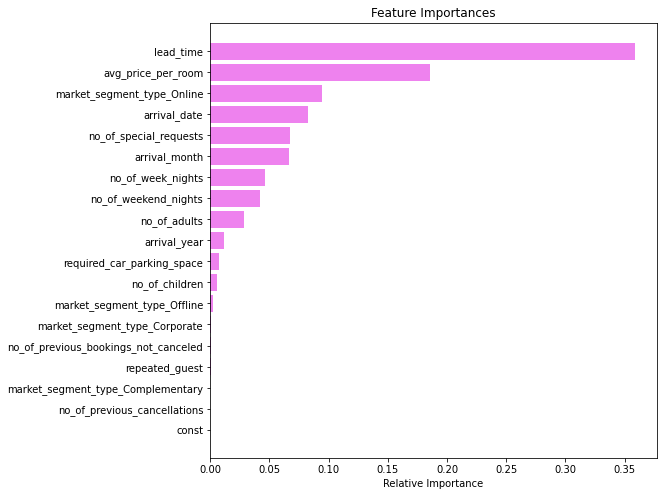

In [304]:
feature_names = list(x_train.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   The diagram above shows important features in descending order.
*   The most important feature is lead_time followed by average price per room



######Pre-pruning the tree

In [305]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

In [306]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [307]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

######Checking the performance of the model on training set

In [308]:
#checking performance
decision_tree_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.831049,0.786321,0.724309,0.754042


######Confusion matrix

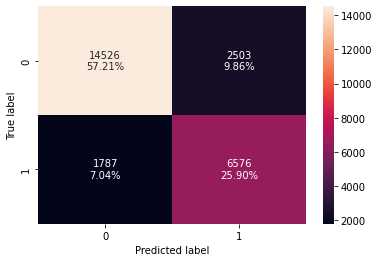

In [309]:
#building a confusion matrix
confusion_matrix_sklearn(estimator,x_train, y_train)

######Checking performance on the testing set

In [310]:
#checking performance
decision_tree_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.834972,0.783362,0.727584,0.754444


######Confusion matrix

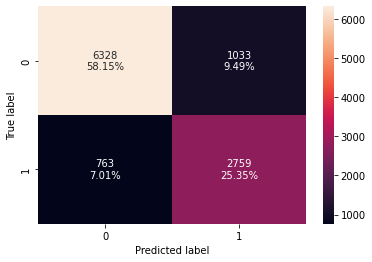

In [311]:
#building a confusion matrix
confusion_matrix_sklearn(estimator,x_test, y_test)



*   From the output above, there is very little difference between the training set and the testing set. This shows that the model is of good performance. It shows that the model is not overfitting 




######Visualizing the tree

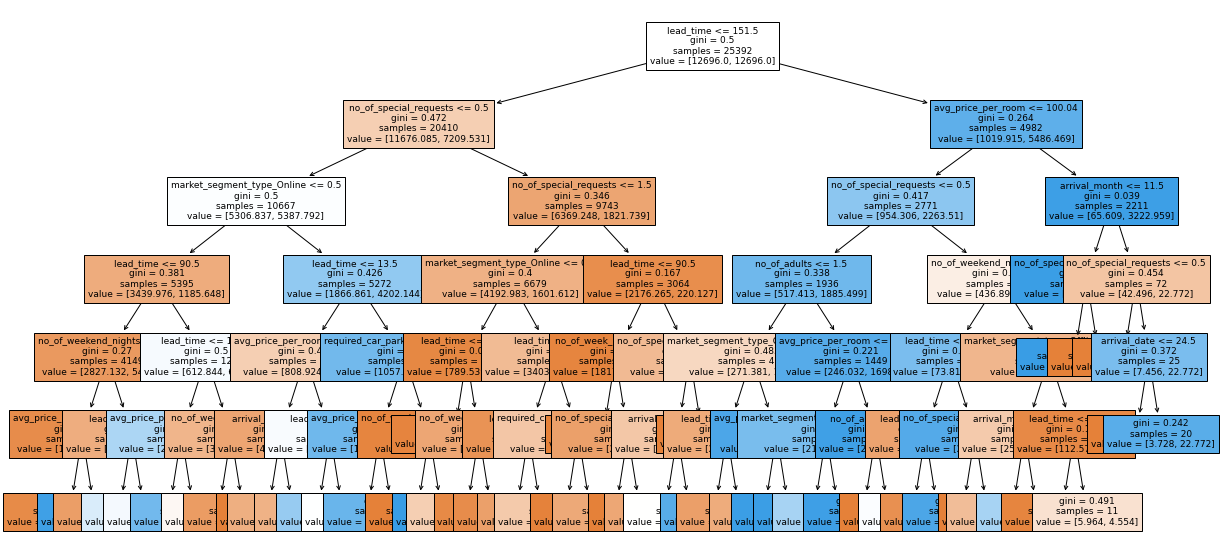

In [312]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()



*   The tree is reqally big. 
*   The inside of the nodes in the tree shows: The feature, the gini impurity,the sample size and the value after division.



In [313]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

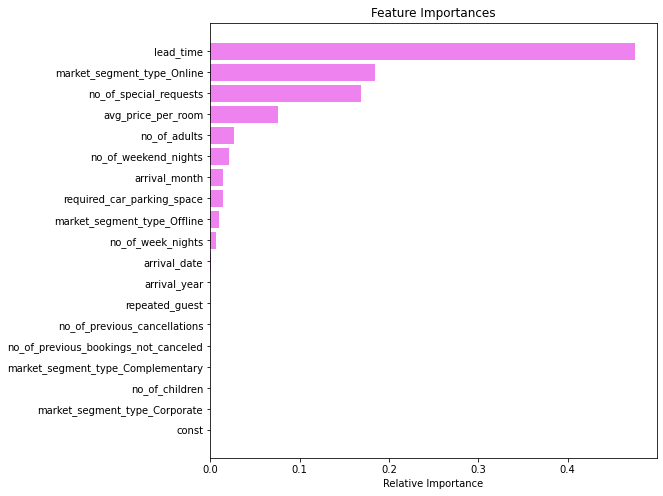

In [314]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   The output above shows the features of the decision tree. It is arranged in descending order. 
*   The most important feature is lead_time



######Cost complexity prunning

In [315]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [316]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008479
1,0.000000e+00,0.008479
2,2.933821e-20,0.008479
3,2.933821e-20,0.008479
4,2.933821e-20,0.008479
...,...,...
1851,8.901596e-03,0.328058
1852,9.802243e-03,0.337860
1853,1.271875e-02,0.350579
1854,3.412090e-02,0.418821


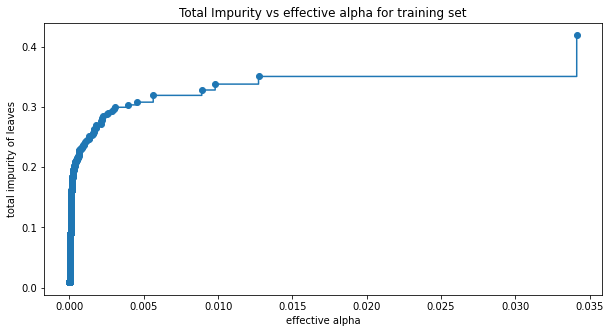

In [317]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [318]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train,y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137165


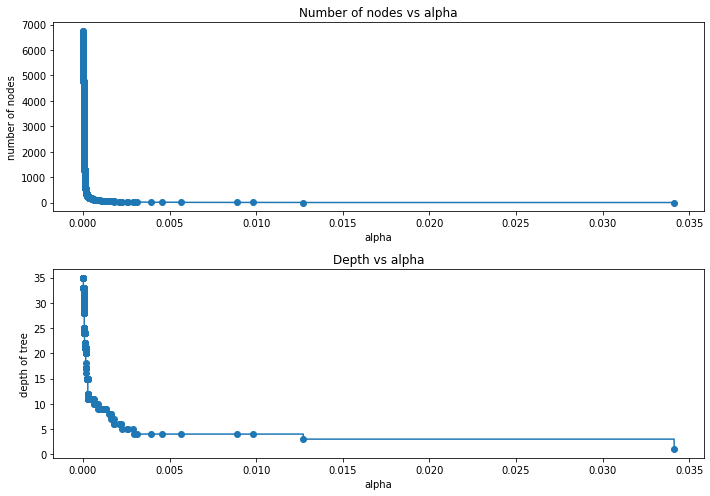

In [319]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()



*   As the alpha increases, the number of nodes and the depth of the tree reduces




######F1 score vs alpha for training and testing set

In [320]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

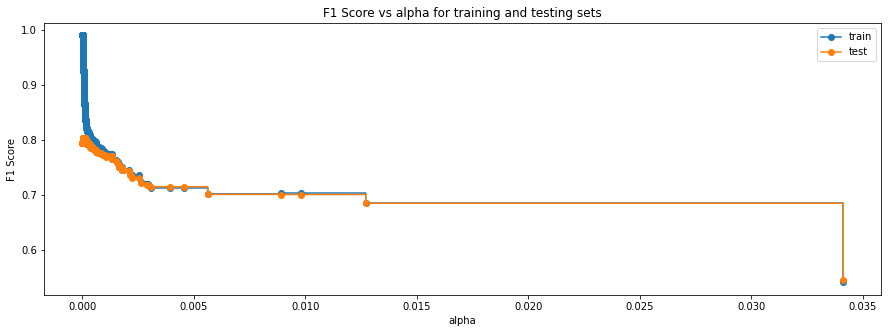

In [321]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [322]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)


DecisionTreeClassifier(ccp_alpha=0.00011932990995334483,
                       class_weight='balanced', random_state=1)


######Checking performance on the training set

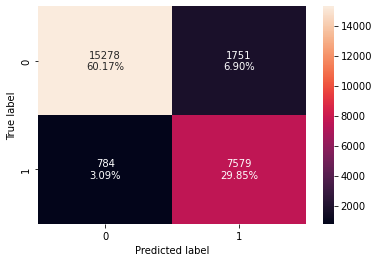

In [323]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [324]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.900165,0.906254,0.812326,0.856723


######Testing performance on the testing set

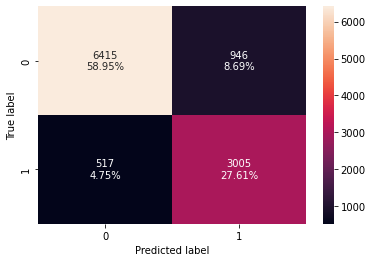

In [325]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [326]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86557,0.853208,0.760567,0.804229




*   The decision tree is not overfitting. This is because There is a little difference between how the model perforemd on the testing data compared to its performance on the training data.



######Comparing the Decision trees

**training comparison**

In [327]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        
        decision_tree_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.831049,0.900165
Recall,0.786321,0.906254
Precision,0.724309,0.812326
F1,0.754042,0.856723




*   When comparing the two methods of pruning, post pruning works best here.
*   This is because it has higher recall, precision and F1



**Testing comparison**

In [328]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        
        decision_tree_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.834972,0.865570
Recall,0.783362,0.853208
Precision,0.727584,0.760567
F1,0.754444,0.804229




*   When comparing the two methods of pruning, post pruning works best here.
*   This is because it has higher recall, precision and F1 as compared to pre-pruning



## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?



*   The hotel should increase their resources on room type 1 and reduce their resources on room type 7 and . This is because many people book room type 1 and very few people use room type 7
*   The hotel should make offers on the 10 month if a person books the hotel and doesn't cancel to encourage even more people to book the hotel and not cancel
*   The hotel should make a policy on cancelation of a booking with special requests. They should reduce the refundable amount. This is to cater for the amount of time and resources that went to the special requests
*  The hotel should create a policy on lead time. If a booking is canceled last minute there should not be any refund. They should create a timeline for cancelation. E.g a 3 days before the actual date of the stay. This is to discourage customers from last minute cancelations

*   The hotel should reduce their parking space and use those resources for something else because most customers do not use it.





